### Student Information
Name: 林育安 Yu-An Lin

Student ID: 109061529

GitHub ID: 54062160

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---

## Table of Contents
1. Take home parts
 - 1.1 exercise 2
 - 1.2 exercise 5
 - 1.3 exercise 6
 - 1.4 exercise 8
 - 1.5 exercise 10
 - 1.6 exercise 11
 - 1.7 exercise 12
 - 1.8 exercise 13
 - 1.9 exercise 14
 - 1.10 exercise 15
 - 1.11 exercise 16
2. Sentiment Labelled Sentences Data Set
 - 2.1 Read the datasets and conbine them into a dictionary
 - 2.2 Dataframe
 - 2.3 Checking the missing value
 - 2.4 Sample
 - 2.5 Tokenize
 - 2.6 PCA to 2 components and to 3 components
 - 2.7 Discretization and Binarization
3. More for Sentiment Labelled Sentences Data Set
 - 3.1 Some visualization methods
 - 3.2 TF-IDF features
 - 3.3 Naive Bayes classifier
4. What are those inefficent parts I noticed?

# 1. Take home parts

---
### 1.1 exercise 2
Experiment with other querying techniques using pandas dataframes. 

In [1]:
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X.loc['20':, 'category':]

category           category_name
2000         0             alt.atheism
2001         0             alt.atheism
2002         3  soc.religion.christian
2003         2                 sci.med
2004         2                 sci.med
...        ...                     ...
2252         2                 sci.med
2253         2                 sci.med
2254         2                 sci.med
2255         2                 sci.med
2256         2                 sci.med

[257 rows x 2 columns]

---
### 1.2 exercise 5
Please check the data and the process below, describe what you observe and why it happened.   

In [2]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
isnull() can only detect whether that block has nothing and the nan object which python has created. If we already give it something, isnull() won't count it although the value we gave was '', 'None', or 'NaN'.

---
### 1.3 exercise 6
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes. 

#### Answer here
The ratio of different categories will be different. See the sample in the following code block. And no duplicate data will be used.

In [3]:
count = np.zeros(4)
for i in range (len(X)): # count the number of each category in X
    count[X.iloc[i, 1]]+=1
print(count)    
for i in range(10): # run ten times to check different sample 
    X_sample = X.sample(n=1000) 
    count1 = np.zeros(4)
    for i in range (1000): # count the number of each category in X_sample
        count1[X_sample.iloc[i, 1]]+=1
    print(count1, count1/count, sum(X_sample.duplicated()))

[480. 584. 594. 599.]
[214. 262. 256. 268.] [0.44583333 0.44863014 0.43097643 0.44741235] 0
[204. 269. 265. 262.] [0.425      0.46061644 0.44612795 0.43739566] 0
[199. 266. 276. 259.] [0.41458333 0.45547945 0.46464646 0.43238731] 0
[220. 261. 248. 271.] [0.45833333 0.44691781 0.41750842 0.4524207 ] 0
[208. 260. 262. 270.] [0.43333333 0.44520548 0.44107744 0.45075125] 0
[203. 259. 262. 276.] [0.42291667 0.44349315 0.44107744 0.46076795] 0
[200. 257. 271. 272.] [0.41666667 0.44006849 0.45622896 0.45409015] 0
[208. 275. 259. 258.] [0.43333333 0.47089041 0.43602694 0.43071786] 0
[215. 271. 274. 240.] [0.44791667 0.4640411  0.46127946 0.40066778] 0
[211. 254. 267. 268.] [0.43958333 0.43493151 0.44949495 0.44741235] 0


---
### 1.4 exercise 8
A side-by-side comparison of the distribution between the two datasets. 

<AxesSubplot:title={'center':'Category distribution'}>

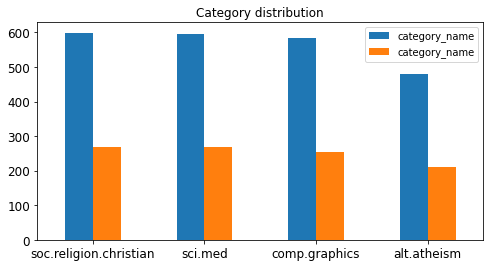

In [4]:
# Answer here

upper_bound = max(max(X.category_name.value_counts()), max(X_sample.category_name.value_counts())) + 10

df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)

df.plot(kind = 'bar',
       title = 'Category distribution',
       legend=True,
       rot = 0, fontsize = 12, figsize = (8,4))

---
### 1.5 exercise 10 
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

ans = np.where(X_counts[4].toarray().reshape(-1) == 1)[0]
print(count_vect.get_feature_names()[ans[1]])

01


---
### 1.6 exercise 11 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

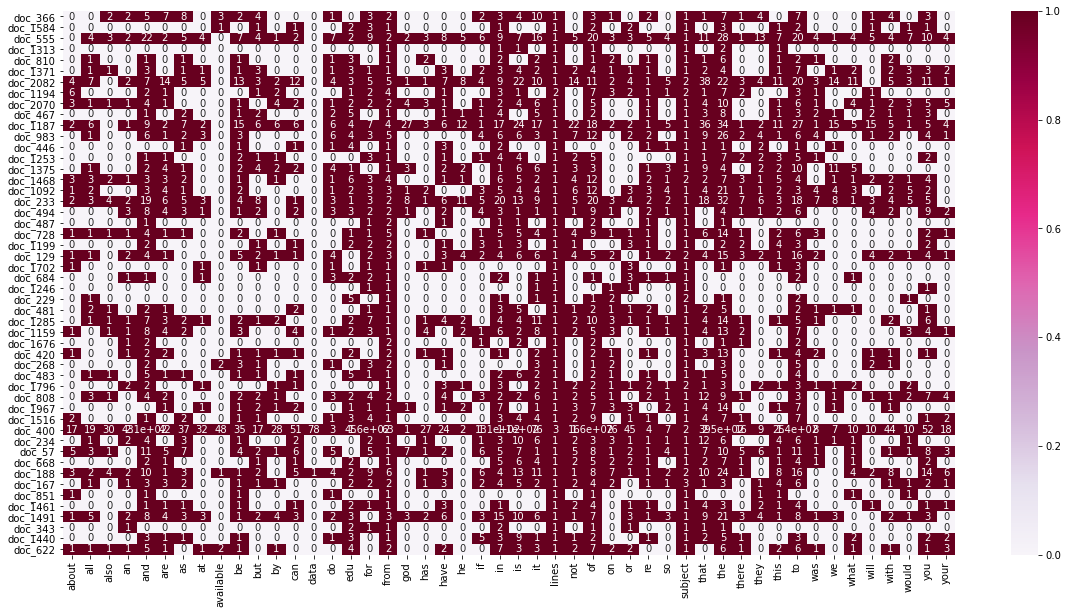

In [6]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

# get 50 samples
X_sample_50 = X.sample(n=50)
ex_count_vect = CountVectorizer()
ex_X_counts = ex_count_vect.fit_transform(X_sample_50.text)

# count the frequencies of words
ex_term_frequencies = np.asarray(ex_X_counts.sum(axis=0))[0]
# get only the words whose frequency > 50 
ind = np.where(ex_term_frequencies>50)
ex_plot_x = np.array(ex_count_vect.get_feature_names())
plot_x = [str(i) for i in ex_plot_x[ind]]
plot_y = ["doc_"+ str(i) for i in list(X_sample_50.index)]
plot_z = ex_X_counts.toarray()[:,ind].reshape(50, -1)
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---
### 1.7 exercise 12 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

(2257, 3)


C:\Users\User\AppData\Local\Temp/ipykernel_8696/1434340304.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


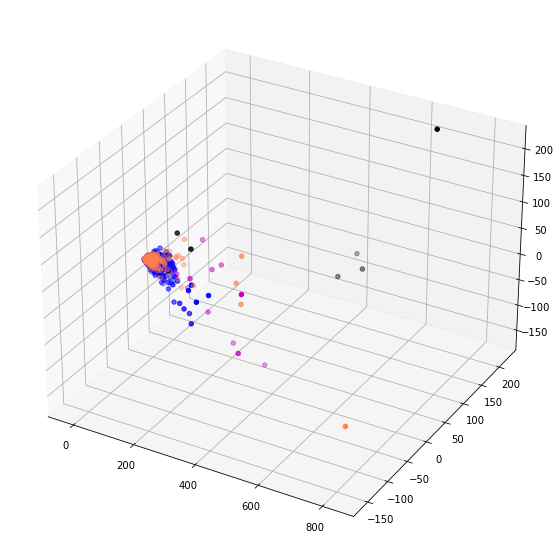

In [7]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (15,10))
ax = fig.gca(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

plt.show()

---
### 1.8 exercise 13 
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [8]:
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=list(count_vect.get_feature_names()), 
        y=list(term_frequencies)
    )
)
# Set title
fig.update_layout(
    title_text="range slider and selectors"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True 
        )
    )
)
fig.show()


---
### 1.9 exercise 14 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [9]:
import plotly.graph_objects as go

index = np.where(term_frequencies>50)[0]
plotX = np.array(count_vect.get_feature_names())
# Create figure
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=list(plotX[index]), 
        y=list(term_frequencies[index])
    )
)
print(len(list(term_frequencies[index])))
# Set title
fig.update_layout(
    title_text="range slider and selectors"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True 
        )
    )
)
fig.show()


1614


---
### 1.10 exercise 15 
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

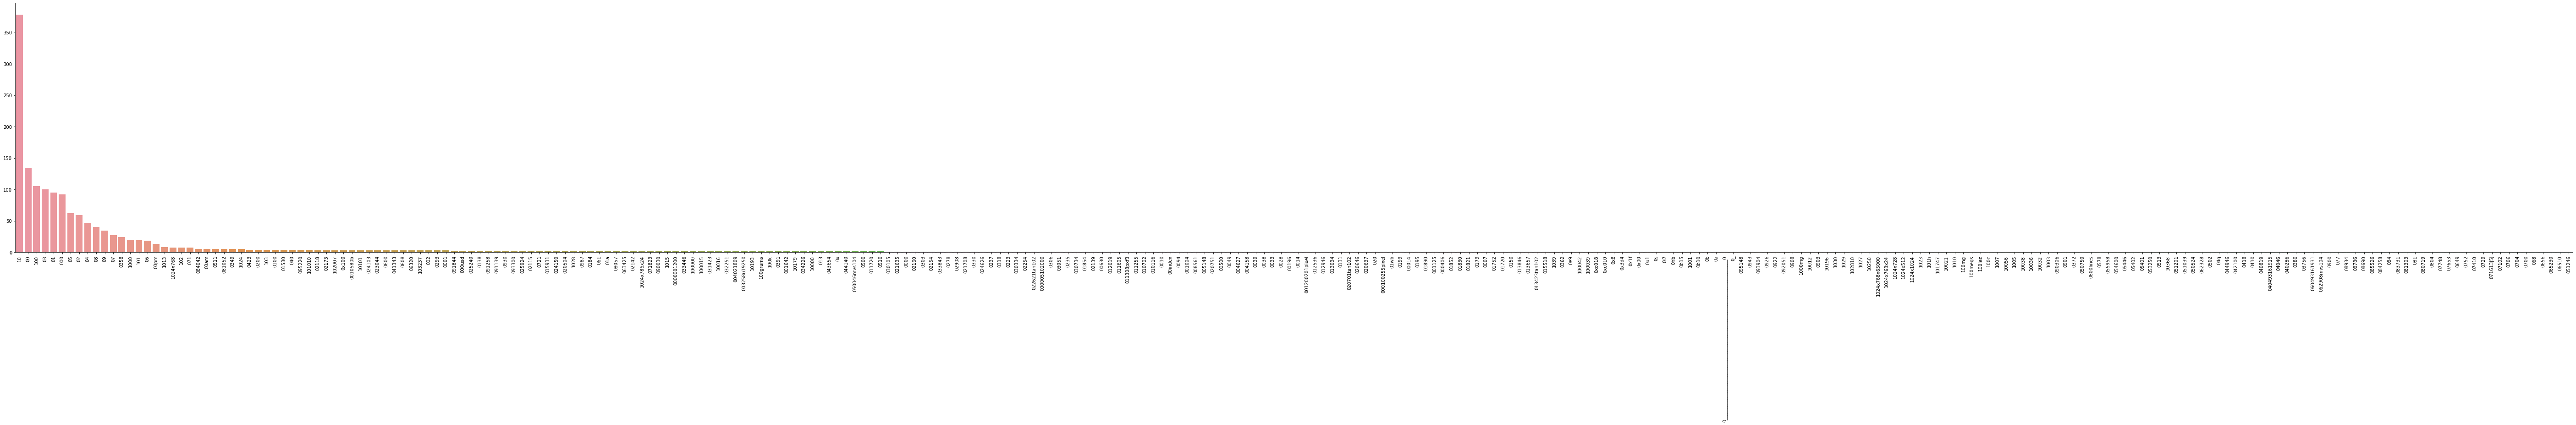

In [10]:
import seaborn as sns

ind = np.argsort(term_frequencies[:300], axis=0)[::-1]
plt.subplots(figsize=(100, 10))
sort_x = np.array(count_vect.get_feature_names()[0:300])
g = sns.barplot(x=sort_x[list(ind)], 
            y=term_frequencies[list(ind)])
g.set_xticklabels(sort_x[list(ind)], rotation = 90);

---
### 1.11 exercise 16 
Try to generate the binarization using the category_name column instead. Does it work?

In [11]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
print(mlb.classes_)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

---

# 2. Sentiment Labelled Sentences Data Set

---
### 2.1 Read the datasets and conbine them into a dictionary
We have three datasets here and each one has sentence and  score of 1 (for positive) or 0 (for negative).
First I read all sentence into list, 'text', and score into list, 'score'. Then, store them into a dictionary call Sentiment_Dict.

In [12]:
import pandas as pd
Path = './new dataset/sentiment labelled sentences/'
datasets = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']
text = []
score = []

for dataset in datasets:
    with open(Path+'/'+dataset+'.txt', encoding='utf-8') as f:
        for line in f:
#             print(line[:-1])
            (sentence, val) = line.split('\t')
            text.append(sentence)
            score.append(int(val[:-1]))
Sentiment_Dict = {'text':text, 'score':score}

print(Sentiment_Dict['text'][0:5], Sentiment_Dict['score'][0:5])

['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.'] [0, 1, 1, 0, 1]


---
### 2.2 Dataframe
We can also directly read the txt into dataframe. Using 'text' and 'score' as the header, I concatenated three dataset into one dataframe.

In [13]:
import pandas as pd
Path = './new dataset/sentiment labelled sentences/'
datasets = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']
column = ['text', 'score']
Dataframe_read = []
for dataset in datasets:
    Dataframe_read.append(pd.read_csv(Path+'/'+dataset+'.txt',  names=column, delimiter = '\t'))

Dataframe_read = pd.concat(Dataframe_read, ignore_index=True)

Dataframe_read.iloc[0:5]

text  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1

Or simply using pd.DataFrame.from_records() to convert dictionary into dataframe.

In [14]:
X_Dataframe = pd.DataFrame.from_records(Sentiment_Dict)

X_Dataframe

score                                               text
0         0  So there is no way for me to plug it in here i...
1         1                        Good case, Excellent value.
2         1                             Great for the jawbone.
3         0  Tied to charger for conversations lasting more...
4         1                                  The mic is great.
...     ...                                                ...
2995      0  I think food should have flavor and texture an...
2996      0                           Appetite instantly gone.
2997      0  Overall I was not impressed and would not go b...
2998      0  The whole experience was underwhelming, and I ...
2999      0  Then, as if I hadn't wasted enough of my life ...

[3000 rows x 2 columns]

---
Add a column called 'score_means' to clearly explain the meaning of score

In [15]:
import helpers.data_mining_helpers as dmh
label_list = ['negative', 'positive']
X_Dataframe['score_means'] = X_Dataframe.score.apply(lambda x:label_list[x])

X_Dataframe[0:5]

score                                               text score_means
0      0  So there is no way for me to plug it in here i...    negative
1      1                        Good case, Excellent value.    positive
2      1                             Great for the jawbone.    positive
3      0  Tied to charger for conversations lasting more...    negative
4      1                                  The mic is great.    positive

Change the order of the dataframe to make score and score_means together

In [16]:
X_Dataframe = X_Dataframe[['text', 'score', 'score_means']]

X_Dataframe[0:5]

text  score score_means
0  So there is no way for me to plug it in here i...      0    negative
1                        Good case, Excellent value.      1    positive
2                             Great for the jawbone.      1    positive
3  Tied to charger for conversations lasting more...      0    negative
4                                  The mic is great.      1    positive

---
### 2.3 Checking the missing value

In [17]:
X_Dataframe.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                          score_means  
0  The amoung of missing records is:   
1                                   0

---
Add dummy data into our data and check the isnull()

In [18]:
dummy_series = pd.Series(['dummy_record', 1, ], index=['text', 'score'])

In [19]:
result_with_series = X_Dataframe.append(dummy_series, ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                          score_means  
0  The amoung of missing records is:   
1                                   1

In [20]:
result_with_series.dropna(inplace=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                          score_means  
0  The amoung of missing records is:   
1                                   0

---
### 2.4 Sample

In [21]:
Sample = X_Dataframe.sample(n=500)
print(len(Sample))
Sample[0:4]

500


text  score score_means
536   Bluetooth range is good - a few days ago I lef...      1    positive
1190  Garbo, who showed right off the bat that her t...      1    positive
2214                                   Extremely Tasty!      1    positive
1123              I'd advise anyone to go and see it.        1    positive

plot the distribution of different label between sampled and original data

<Figure size 432x288 with 0 Axes>

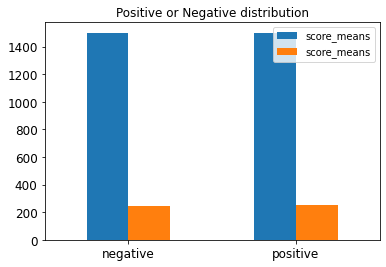

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

upper_bound = max(max(X_Dataframe.score_means.value_counts()), max(Sample.score_means.value_counts())) + 100

df = pd.concat([X_Dataframe.score_means.value_counts(), Sample.score_means.value_counts()], axis=1)
plt.figure(0)
df.plot(kind = 'bar',
       title = 'Positive or Negative distribution',
       legend=True,
       rot = 0, fontsize = 12, figsize = (6,4))
plt.show()

---
### 2.5 Tokenize

In [23]:
import nltk

X_Dataframe['unigrams'] = X_Dataframe['text'].apply(lambda x: dmh.tokenize_text(x))
X_Dataframe[0:4]["unigrams"]

C:\Users\User\AppData\Local\Temp/ipykernel_8696/3748120938.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

---
### 2.6 PCA to 2 components and to 3 components

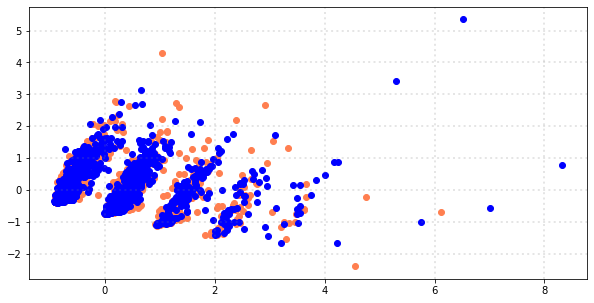

In [24]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Counts = count_vect.fit_transform(X_Dataframe.text)

reduced = PCA(n_components = 2).fit_transform(Counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (10,5))
ax = fig.subplots()

for c, label in zip(col, label_list):
    xs = reduced[X_Dataframe['score_means'] == label].T[0]
    ys = reduced[X_Dataframe['score_means'] == label].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

plt.show()

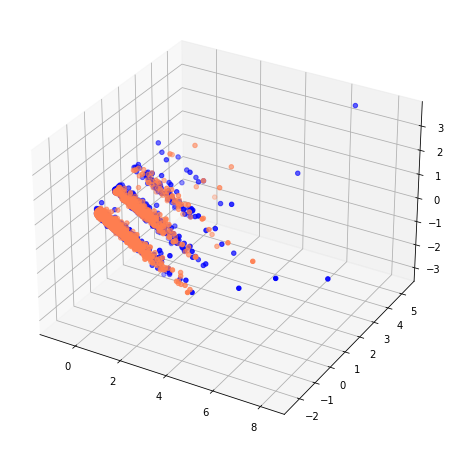

In [25]:
reduced = PCA(n_components = 3).fit_transform(Counts.toarray())

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for c, label in zip(col, label_list):
    xs = reduced[X_Dataframe['score_means'] == label].T[0]
    ys = reduced[X_Dataframe['score_means'] == label].T[1]
    zs = reduced[X_Dataframe['score_means'] == label].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

plt.show()

We want to reduce the feature size and cut down the time to do the classification or regression with PCA. But if we choose too little components, the machine may not clearly learning information from the data. It seems that 2 and 3 components are not enough to separate this dataset.

---
### 2.7 Discretization and Binarization

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X_Dataframe.score)
print(mlb.classes_)
X_Dataframe['bin_score'] = mlb.transform(X_Dataframe.score).tolist()
X_Dataframe[0:9]

[0 1]


C:\Users\User\AppData\Local\Temp/ipykernel_8696/2951243163.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  score score_means  \
0  So there is no way for me to plug it in here i...      0    negative   
1                        Good case, Excellent value.      1    positive   
2                             Great for the jawbone.      1    positive   
3  Tied to charger for conversations lasting more...      0    negative   
4                                  The mic is great.      1    positive   
5  I have to jiggle the plug to get it to line up...      0    negative   
6  If you have several dozen or several hundred c...      0    negative   
7        If you are Razr owner...you must have this!      1    positive   
8                Needless to say, I wasted my money.      0    negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]

The LabelBinarizer() will detect the number of categories. If there is only two categories, it will return one-size array not two-size onehot array.

---

## 3. More for Sentiment Labelled Sentences Data Set

---
### 3.1 Some visualization methods

---
slider

In [27]:
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

# analyze = count_vect.build_analyzer()
print(Counts.shape) # the shape is (number of documents, number of words)

term_frequencies = np.asarray(Counts.sum(axis=0))[0]

index = np.where(term_frequencies>50)[0]
plotX = np.array(count_vect.get_feature_names())

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=list(plotX[index]), 
        y=list(term_frequencies[index])
    )
)
print(len(list(term_frequencies[index])))
# Set title
fig.update_layout(
    title_text="range slider and selectors"
)
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True 
        )
    )
)
fig.show()


(3000, 5155)
97


---
Long tail 

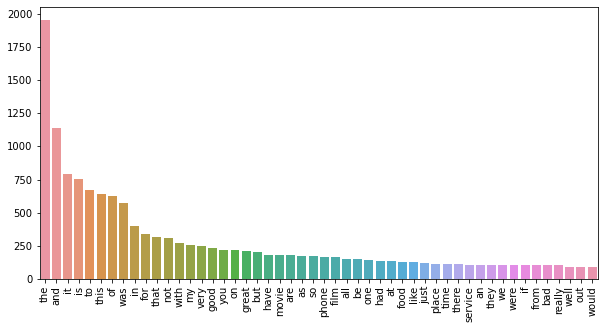

In [28]:
# sort to get the higher frequencies in front of the others
ind = np.argsort(term_frequencies, axis=0)[::-1]

plt.subplots(figsize=(10, 5))
sort_x = np.array(count_vect.get_feature_names())
g = sns.barplot(x=sort_x[list(ind[:50])], 
            y=term_frequencies[list(ind[:50])])
g.set_xticklabels(sort_x[list(ind[:50])], rotation = 90);

---
Pie chart

In [29]:
circle_x = np.full((15+1), None)
circle_x[:-1] = sort_x[list(ind[:15])]
circle_x[-1] = 'others'

circle_f = np.zeros((15+1))
circle_f[:-1] = term_frequencies[list(ind[:15])]
circle_f[-1] = sum(term_frequencies)-sum(term_frequencies[list(ind[:15])])
fig = go.Figure(data=[go.Pie(labels=circle_x, 
                             values=circle_f)])
fig.show()

---
Word Cloud

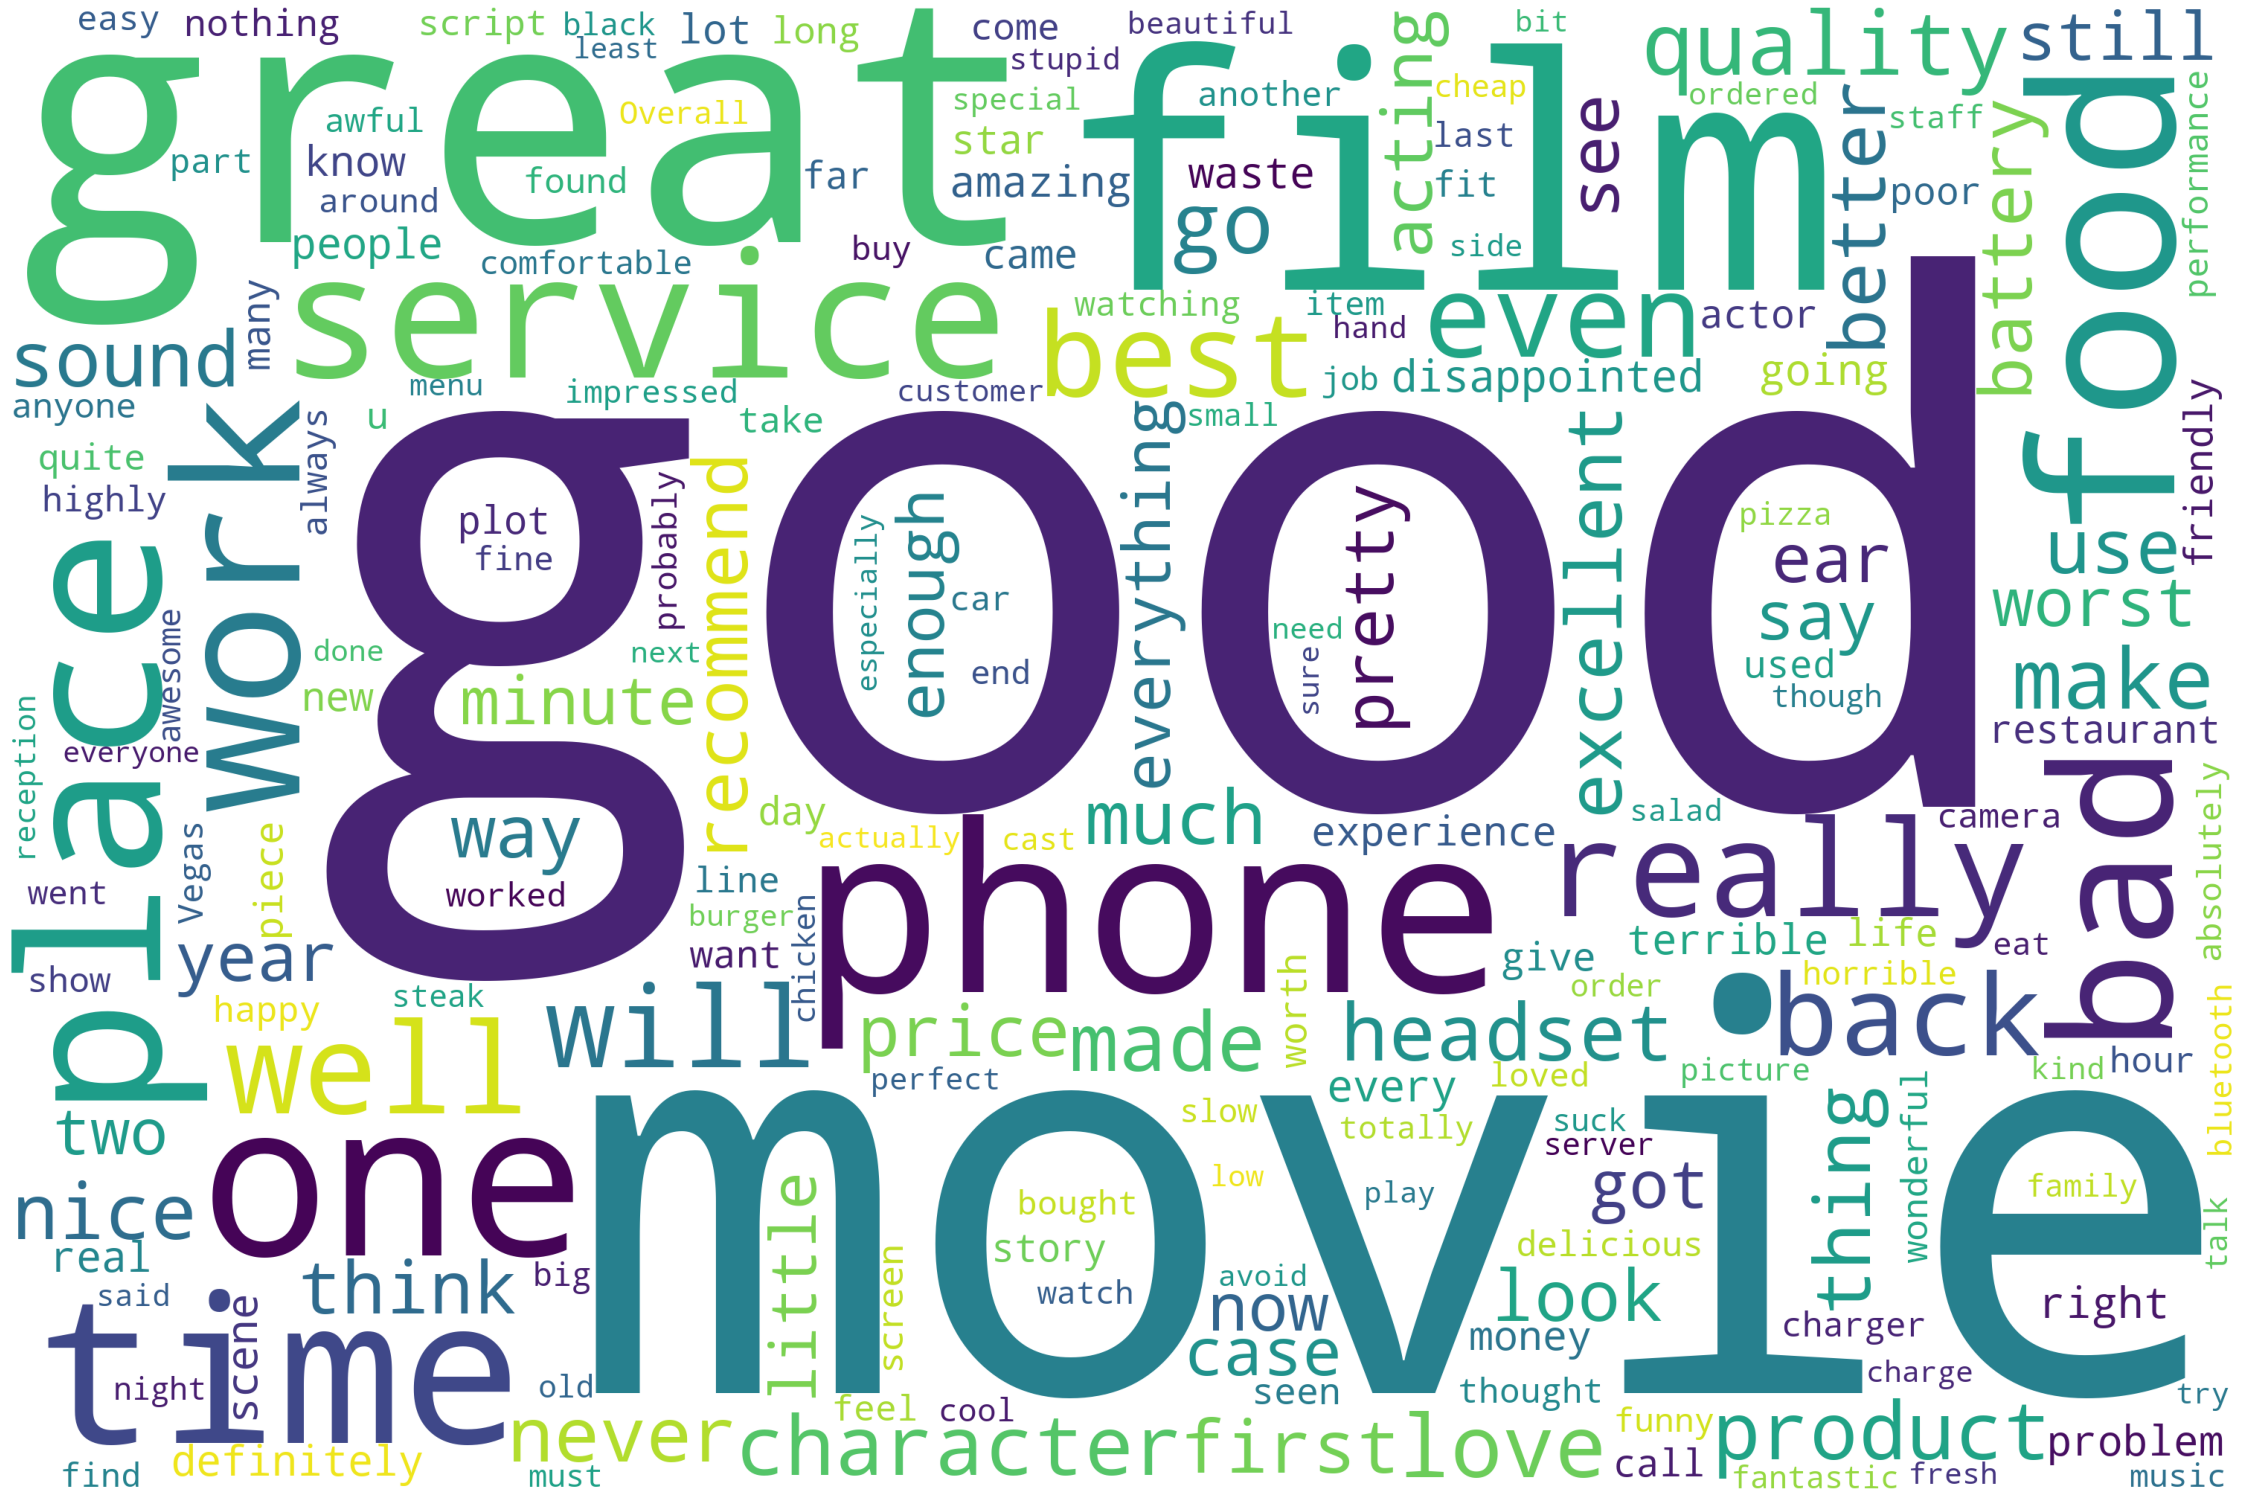

In [30]:
from wordcloud import WordCloud, STOPWORDS 

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='white', collocations=False, 
                      stopwords = STOPWORDS).generate(X_Dataframe.text.str.cat(sep=' '))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

---
### 3.2 TF-IDF features

In [31]:
import nltk
import math
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(X_Dataframe.text)
# vectorizer.get_feature_names()

In [32]:
print(TFIDF[1:3])

TFIDF.todense()[0, 1013]

  (0, 4861)	0.6340416987777308
  (0, 1603)	0.47072204948062
  (0, 713)	0.513063291919973
  (0, 1993)	0.3364192842689825
  (1, 2449)	0.8233779731740677
  (1, 2023)	0.3996123298170515
  (1, 4531)	0.1955703921972776
  (1, 1829)	0.352293799045279


0.3982952688733835

In [33]:
X_Dataframe.text[0:5]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: text, dtype: object

---
### 3.3 Naive Bayes classifier

I set the random_state of the train_test_split as 1 in two methods, so that they can use the same training data and the same testing data to make sure the fairness.

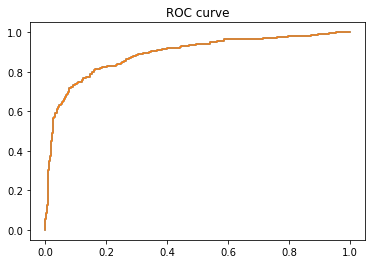

In [34]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, X_Dataframe.score, test_size=0.3, random_state=1)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)
Y_score = bnb.predict_proba(X_test)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(Y_test, Y_score[:, 1])

X_train, X_test, Y_train, Y_test = train_test_split(Counts, X_Dataframe.score, test_size=0.3, random_state=1)
bnb1 = BernoulliNB(binarize=0.0)
bnb1.fit(X_train, Y_train)
bnb1.score(X_test, Y_test)
Y_score = bnb1.predict_proba(X_test)
fpr_bnb1, tpr_bnb1, thresholds_bnb1 = roc_curve(Y_test, Y_score[:, 1])

plt.figure()
plt.plot(fpr_bnb, tpr_bnb)
plt.plot(fpr_bnb1, tpr_bnb1)
plt.title('ROC curve')
plt.show()

The TFIDF includes two parts: term frequency(TF) and inverse document frequency(IDF). TF will give the word frequency in a row and IDF will return the derivative of the word appearence in total dataset. In principle, TFIDF will give a better results than the word-frequency, because it will cut down some common but no meaning words. But the two methods give the same testing score when the random state of the train_test_split is the same. I guess the reason is that sentences in the new dataset are much shorter than the twenty_group dataset. So I also test the twenty_group dataset below.

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X.category, test_size=0.25, random_state=1)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8548672566371681

In [36]:
vectorizer = TfidfVectorizer()
TFIDF = vectorizer.fit_transform(X.text)
X_train, X_test, Y_train, Y_test = train_test_split(TFIDF, X.category, test_size=0.25, random_state=1)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8548672566371681

It got the same score, too! So the TFIDF here may not be useful.

---

## 4. What are those inefficent parts I noticed?

1. For the new datset which has only two categories, it is not necessary to use the binarization. 
2. The 0 and 1 score mean negative and positive separately. It is very easy to understand so that we don't need to give a new column in the dataframe for it's meaning.